In [28]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('scandic')

In [23]:
# read 0th file
df_0 = pd.read_csv("velocity_trajs/v_0.dat", sep=' ', header=None)
print("File 0 read.")
df_0.columns = ['t', 'v_x', 'v_y', 'v_z']
v_0 = np.array([df_0['v_x'].to_numpy(), df_0['v_y'].to_numpy(), df_0['v_z'].to_numpy()])

# read the files
df_1 = pd.read_csv("velocity_trajs/v_1.dat", sep=' ', header=None)
print("File 1 read.")
df_1.columns = ['t', 'v_x', 'v_y', 'v_z']
v_1 = np.array([df_1['v_x'].to_numpy(), df_1['v_y'].to_numpy(), df_1['v_z'].to_numpy()])

df_2 = pd.read_csv("velocity_trajs/v_2.dat", sep=' ', header=None)
print("File 2 read.")
df_2.columns = ['t', 'v_x', 'v_y', 'v_z']
v_2 = np.array([df_2['v_x'].to_numpy(), df_2['v_y'].to_numpy(), df_2['v_z'].to_numpy()])

File 0 read.
File 1 read.
File 2 read.


In [20]:
import numpy as np
from tqdm import tqdm

def mean_square_displacement(v, t):
    num_steps = v.shape[1]
    msd = np.zeros(num_steps)

    for i in tqdm(range(num_steps), desc='Calculating MSD'):
        delta_t = t[i+1:] - t[i]
        delta_rx = v[0, i+1:] * delta_t
        delta_ry = v[1, i+1:] * delta_t
        delta_rz = v[2, i+1:] * delta_t
        squared_displacement = delta_rx**2 + delta_ry**2 + delta_rz**2
        msd[i] = np.mean(squared_displacement)

    return msd

# Example usage with a single particle
v_particle = np.array([[1, 3, 5, 7],
                       [2, 4, 6, 8],
                       [3, 6, 9, 12]])
t = np.array([0, 1, 2, 3])

result = mean_square_displacement(v_particle, t)
print(result)

Calculating MSD:   0%|          | 0/4 [00:00<?, ?it/s]/Users/jakub.dokulil/opt/anaconda3/envs/comp_phys/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jakub.dokulil/opt/anaconda3/envs/comp_phys/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Calculating MSD: 100%|██████████| 4/4 [00:00<00:00, 2405.34it/s]

[980.66666667 585.         257.                  nan]


In [24]:
mean_square_displ_0 = mean_square_displacement(v_0, df_0['t'].to_numpy())

Calculating MSD:  99%|█████████▉| 198133/200000 [01:26<00:00, 21696.02it/s]/Users/jakub.dokulil/opt/anaconda3/envs/comp_phys/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jakub.dokulil/opt/anaconda3/envs/comp_phys/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Calculating MSD: 100%|██████████| 200000/200000 [01:26<00:00, 2311.43it/s] 


In [25]:
mean_square_displ_1 = mean_square_displacement(v_1, df_1['t'].to_numpy())

Calculating MSD: 100%|██████████| 200000/200000 [01:53<00:00, 1754.41it/s] 


In [26]:
mean_square_displ_2 = mean_square_displacement(v_2, df_2['t'].to_numpy())

Calculating MSD: 100%|██████████| 200000/200000 [02:41<00:00, 1235.17it/s] 


In [27]:
print("MSD calculated. \n")

print("Mean square displacement for dataset 0: ", mean_square_displ_0)
print("Mean square displacement for dataset 1: ", mean_square_displ_1)
print("Mean square displacement for dataset 2: ", mean_square_displ_2)


MSD calculated. 

Mean square displacement for dataset 0:  [9.98098477e+11 9.98088524e+11 9.98078571e+11 ... 1.99043130e+02
 7.98649573e+01            nan]
Mean square displacement for dataset 1:  [9.89099229e+11 9.89089191e+11 9.89079153e+11 ... 4.59847081e+02
 1.83882157e+02            nan]
Mean square displacement for dataset 2:  [8.43263210e+11 8.43254799e+11 8.43246388e+11 ... 1.78435272e+02
 7.31271207e+01            nan]


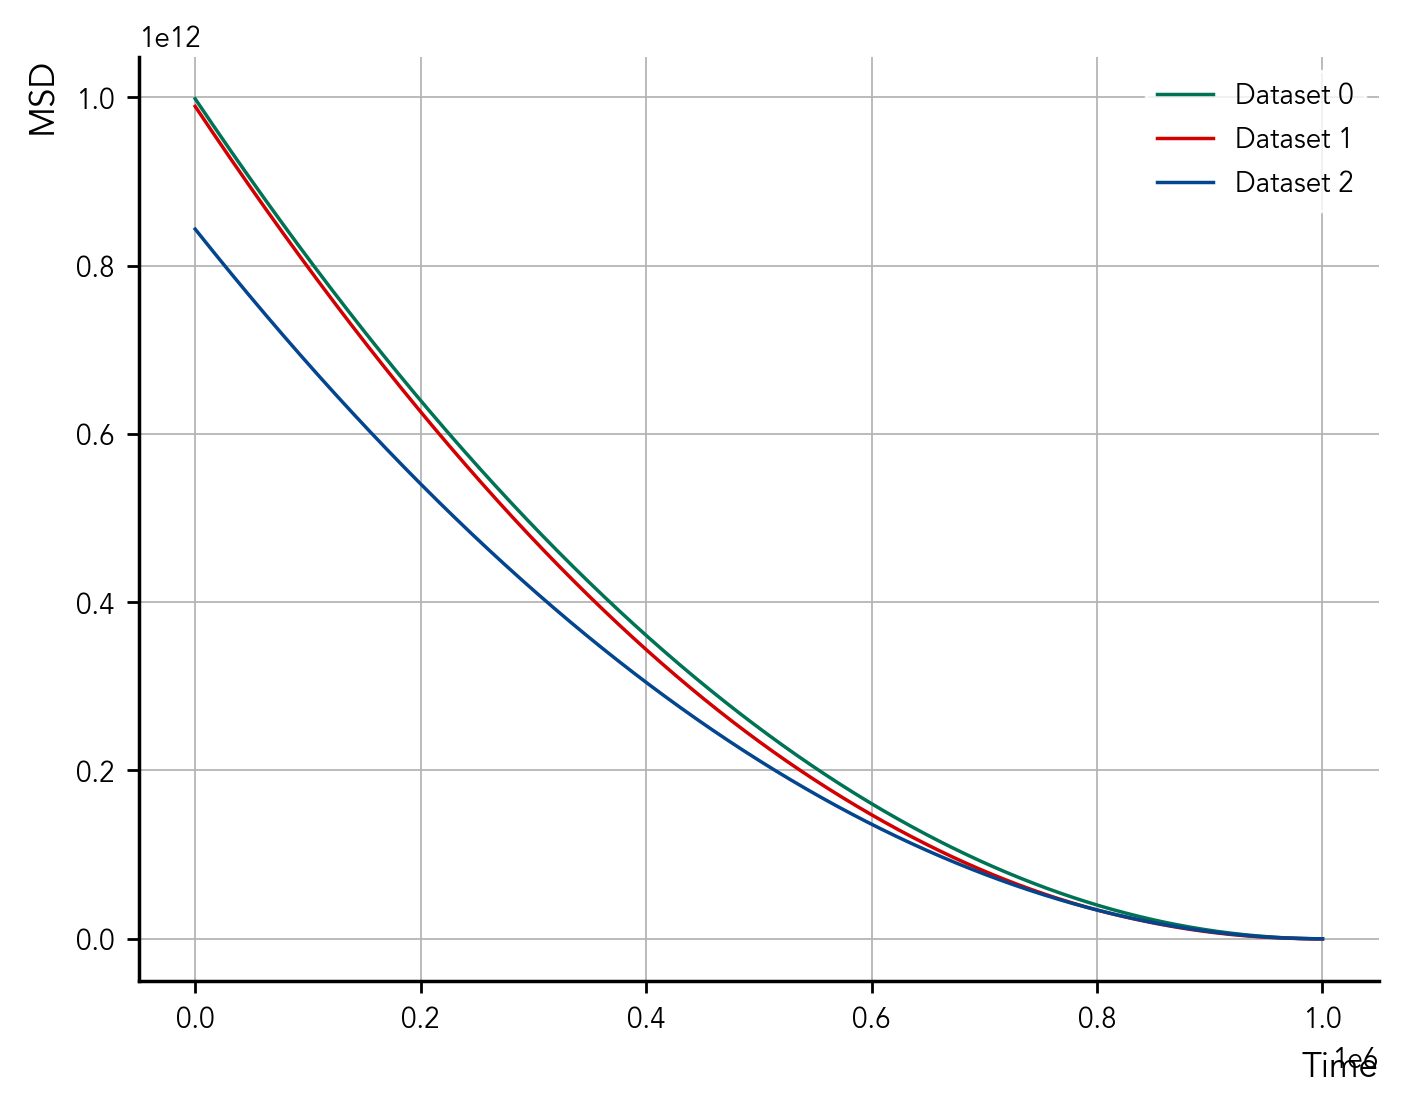

In [31]:
# plot the msd

plt.plot(df_0['t'].to_numpy(), mean_square_displ_0, label='Dataset 0')
plt.plot(df_1['t'].to_numpy(), mean_square_displ_1, label='Dataset 1')
plt.plot(df_2['t'].to_numpy(), mean_square_displ_2, label='Dataset 2')
plt.xlabel('Time')
plt.ylabel('MSD')
plt.legend()
plt.show()